# Playground Linear Model

### Import Libraries

In [0]:
import numpy as np
import matplotlib.pyplot as plt

### Functions & Classes

In [0]:
def train_test_split(*arrays, test_ratio=0.1, random_state=42):
    """Split the data onto train set and test set. The function shuffle the data 
    before splitting it

    Parameters:
    ----------

    *arrays: array-like
        Sequence of indexables with same length / shape[0]

    test_ratio : float, between 0 and 1
        Percentage of test set 

    random_state : integer
        Random state seed

    Returns:
    -------

    splitting : list, length=2 * len(arrays)
        List containing train-test split of inputs.
    
    """

    np.random.seed(random_state)
    index = np.random.permutation(np.arange(len(arrays[0])))
    test_size = int(len(arrays[0])*test_ratio)

    def wrapper():
        for element in arrays:
            test_index = index[:test_size]
            train_index = index[test_size:]
            test = element[test_index]
            train = element[train_index]
            yield train
            yield test

    return tuple(wrapper())

class MinMaxScaler(object):
    """ Scaling the data to between 0 and 1 """

    def __init__(self):
        pass
    
    def fit(self, X):
        self.min_ = X.min(axis=0)
        self.max_ = X.max(axis=0)

        return self

    def transform(self, X):
        diff_X = X - self.min_
        diff_minmax = self.max_ - self.min_

        return diff_X / diff_minmax
    
    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)


class StandardScaler(object):
    """ Standardize the data """
    
    def __init__(self):
        pass
    
    def fit(self, X):
        self.mean_ = X.mean(axis=0)
        self.stddev_ = X.std(axis=0)

        return self

    def transform(self, X):
        diff_mean = X - self.mean_

        return diff_mean / self.stddev_
    
    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)


def make_batch_index(sample_size, num_batch, size, shuffle=False, random_state=42):
    """Make batch index for further batch making process

    Parameters:
    ----------

    sample_size : integer 
        Sample size

    num_batch : integer
        Number of batch

    size : integer
        sample size will be created
    
    shuffle : boolean
        If True, using permutation to create index.
        If False, using arange to create index 

    random_state : integer
        Random state seed

    Returns:
        Batch index
    
    """


    gen = np.random.RandomState(random_state)
    if sample_size == size:
        if shuffle:
            index_batch = np.array_split(gen.permutation(sample_size), num_batch)
        else:
            index_batch = np.array_split(np.arange(sample_size), num_batch)
    elif num_batch <= size:
        index_batch = np.array_split(gen.randint(0, sample_size, size=size), num_batch)
    else:
        raise ValueError("Size must be higher than number of batch")
    
    return index_batch


def r2_score(predictions, labels):

    """Calculate R-Squared (Coefficients of Determination) between predictions and labels.

    Parameters:
    ----------

    predictions : array-like
    The predictions of an estimator

    labels : array-like
    The true labels of data

    Raise:
    -----

    ValueError: get raised when the length of predictions and labels are not the same

    """
    
    
    predictions = predictions.ravel()
    labels = labels.ravel()
    if len(predictions) == len(labels):
        ybar = np.mean(labels)
        sres = np.sum(np.power(labels - predictions, 2))
        stot = np.sum(np.power(labels - ybar, 2))
        return 1 - (sres / stot)
    else:
        raise ValueError("The length of predictions and labels are not the same")


def to_categorical(labels):

    sample = len(labels)
    cols = np.max(labels) + 1
    result = np.zeros(shape=(sample, cols))
    for i, row in enumerate(result):
        row[labels[i]] = 1
    
    return result


def accuracy_score(predictions, labels):

    """Calculate the accuracy score between predictions and labels. \
    The percentage of correct predictions.

    Parameters:
    ----------

    predictions : array-like
    The predictions of an estimator

    labels : array-like
    The true labels of data

    Raise:
    -----

    ValueError: raise value error when the length of predictions and labels are not the same

    """

    predictions = predictions.ravel()
    labels = labels.ravel()
    if len(predictions) == len(labels):
        return np.sum(np.equal(predictions, labels)) / len(predictions)
    else:
        raise ValueError("The length of predictions and labels are not the same")

### Dataset

In [0]:
X_train = np.random.random(size=(500, 1)) + 5
X_test = np.random.random(size=(500, 1)) + 5
bias = np.random.normal(0, 0.21, size=(500, 1))
y_train = 2 * X_train + 5 + bias
y_test = 2 * X_test + 5 + bias

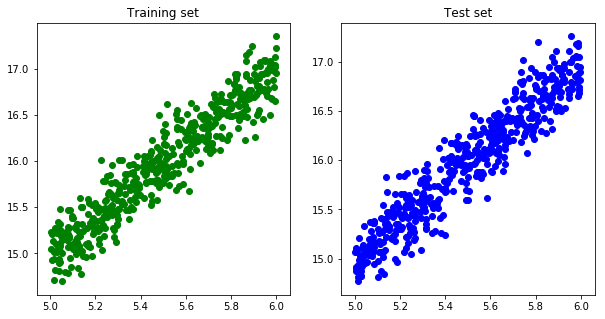

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].scatter(X_train, y_train, c='g')
axes[0].set_title("Training set")
axes[1].scatter(X_test, y_test, c='b')
axes[1].set_title("Test set");

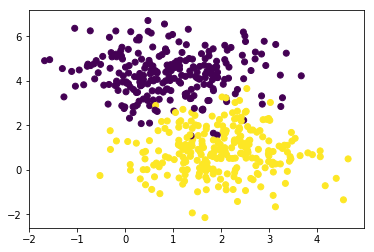

In [5]:
from sklearn.datasets import make_blobs

X_class, y_class = make_blobs(n_samples=500, centers=2, n_features=2, random_state=0)
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_class, y_class)

plt.scatter(X_class[:, 0], X_class[:, 1], c=y_class);

### Model to Compare

In [6]:
from sklearn.linear_model import LinearRegression, SGDRegressor, LogisticRegression
lin_reg = LinearRegression().fit(X_train, y_train)
sgr = SGDRegressor().fit(X_train, y_train)
# logreg_s = LogisticRegression().fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


---

## Testing Site

---

## L1 Regularization

In [0]:
class l1_regularization():

    def __init__(self, alpha):
        self.alpha = alpha

    def __call__(self, w):
        return self.alpha * np.linalg.norm(w, 1)

    def grad(self, w):
        return self.alpha * np.sign(w)

---

## L2 Regularization

In [0]:
class l2_regularization():

    def __init__(self, alpha):
        self.alpha = alpha

    def __call__(self, w):
        return self.alpha * np.linalg.norm(w, 2)

    def grad(self, w):
        return self.alpha * np.sum(w ** 2) * w

## L1 L2 Regularization

In [0]:
class l1_l2_regularization():

    def __init__(self, alpha, l1_ratio):
        self.alpha = alpha
        self.l1_ratio = l1_ratio

    def __call__(self, w):
        l1_contrib = self.l1_ratio * np.linalg.norm(w, 1)
        l2_contrib = (1 - self.l1_ratio) * np.linalg.norm(w, 2)

        return self.alpha * (l1_contrib + l2_contrib)

    def grad(self, w):
        l1_contrib = self.l1_ratio * np.sign(w)
        l2_contrib = (1 - self.l1_ratio) * np.sum(w ** 2) * w

        return self.alpha * (l1_contrib + l2_contrib)

## Regression (Base)

In [0]:
import math

class Regression(object):

    def __init__(self):
        pass

    def predict(self, X):
        X = np.c_[np.ones(X.shape[0]), X]

        self._predictions = X.dot(self._weights)
        return self._predictions

    def score(self, X, y):
        try:
            predictions = self._predictions
        except Exception:
            predictions = self.predict(X)
        labels = y

        return r2_score(predictions, labels)

## LinearRegression

In [0]:
class LinearRegression(Regression):

    def __init__(self, regularization=False, alpha=0.0001):
        self.regularization = regularization
        self.alpha = alpha

    def fit(self, X, y):
        X = np.c_[np.ones(X.shape[0]), X]
        # Calculate weights by least squares (using Moore-Penrose pseudoinverse)
        if self.regularization:
            regularization_mat = np.eye(X.shape[1])
            regularization_mat[0, 0] = 0
            mat = X.T.dot(X) + regularization_mat
            U, S, V = np.linalg.svd(mat)
            S = np.diag(S)
            X_sq_reg_inv = V.dot(np.linalg.pinv(S)).dot(U.T)
            self._weights = X_sq_reg_inv.dot(X.T).dot(y)
        else:
            U, S, V = np.linalg.svd(X.T.dot(X))
            S = np.diag(S)
            X_sq_reg_inv = V.dot(np.linalg.pinv(S)).dot(U.T)
            self._weights = X_sq_reg_inv.dot(X.T).dot(y)
        
        self.weights_ = self._weights.ravel()[1:]
        self.bias_ = self._weights[0]
        return self

In [12]:
full_batch_regressor = LinearRegression(regularization=True).fit(X_train, y_train)
print("Regressor weights: ", full_batch_regressor.weights_)
print("Regressor bias: ", full_batch_regressor.bias_)

Regressor weights:  [1.9600029]
Regressor bias:  [5.20408375]


In [13]:
print("Sklearn LinearRegression R-Squared Score on test set: ", lin_reg.score(X_test, y_test))
print("My FullBatchLinearRegression R-Squared Soore on test set: ", full_batch_regressor.score(X_test, y_test))

Sklearn LinearRegression R-Squared Score on test set:  0.8960901640988785
My FullBatchLinearRegression R-Squared Soore on test set:  0.8959272049498727


## BatchGDRegressor

In [0]:
class BatchGDRegressor(Regression):

    def __init__(self, num_batch=None, iterations=10000, learning_rate=0.001, penalty=None, alpha=0.0001, l1_ratio=0.15):
        self.num_batch = num_batch
        self.iterations = iterations
        self.learning_rate = learning_rate
        self.penalty = penalty
        self.alpha = alpha
        self.l1_ratio = l1_ratio
        if penalty == 'l1':
            self._regularization = l1_regularization(alpha=self.alpha)
        elif penalty == 'l2':
            self._regularization = l2_regularization(alpha=self.alpha)
        elif penalty == 'elasticnet':
            self._regularization = l1_l2_regularization(alpha=self.alpha, l1_ratio=self.l1_ratio)
        elif penalty == None:
            self._regularization = lambda x: 0
            self._regularization.grad = lambda x: 0

    def _weights_init(self, n_features):
        lim = 1 / math.sqrt(n_features)
        self._weights = np.random.uniform(-lim, lim, size=(n_features, 1))

    def _calc_loss(self, y_pred, y_train):
        return 0.5 * np.mean((y_pred - y_train)**2)

    def _calc_gradient(self, X, y_pred, y_train):
        return X.T.dot(y_pred - y_train)
        
    def fit(self, X, y):
        if self.num_batch == None:
            self.num_batch = int(X.shape[0] / 20)
        X = np.c_[np.ones(X.shape[0]), X]
        y = y.reshape(-1, 1)
        self.loss_vals_ = []
        self._weights_init(X.shape[1])
        percentage = 0 

        for i in range(self.iterations):
            batch_index = make_batch_index(sample_size=X.shape[0], num_batch=self.num_batch, 
                                            size=X.shape[0], shuffle=True, random_state=42)
 
            for batch in batch_index:
                batch_X = X[batch]
                batch_y = y[batch]

                y_pred = batch_X.dot(self._weights)
                loss_val = self._calc_loss(y_pred, batch_y) + self._regularization(self._weights)
                self.loss_vals_.append(loss_val)
                gradient = self._calc_gradient(batch_X, y_pred, batch_y) + self._regularization.grad(self._weights)
                self._weights -= (self.learning_rate * gradient)
                
            if i % (self.iterations/100) == 0:
                print("\rProcess {}%, loss_val: {}".format(percentage, loss_val), end='')
                percentage += 1
        print("\rProcess 100%, loss_val: {}".format(loss_val), end='')
        
        self.weights_ = self._weights.ravel()[1:]
        self.bias_ = self._weights[0]
        self.loss_vals_ = np.array(self.loss_vals_)

        return self

In [15]:
mini_batch_sgr = BatchGDRegressor().fit(X_train, y_train)

Process 100%, loss_val: 0.015260820039008074

In [16]:
print("BatchGDRegressor score: ", mini_batch_sgr.score(X_test, y_test))

BatchGDRegressor score:  0.8960306354692906


In [17]:
print("BatchGDRegressor bias: ", mini_batch_sgr.bias_)
print("BatchGDRegressor weights: ", mini_batch_sgr.weights_)

BatchGDRegressor bias:  [4.961956]
BatchGDRegressor weights:  [2.00307469]


## RidgeRegression

In [0]:
class RidgeRegression(BatchGDRegressor):

    def __init__(self, num_batch=None, iterations=10000, learning_rate=0.001, alpha=0.0001):
        super().__init__(num_batch=num_batch,
                         iterations=iterations,
                         learning_rate=learning_rate,
                         penalty='l2',
                         alpha=alpha,
                         l1_ratio=None)
        
    def fit(self, X, y):
        super().fit(X, y)

        return self


In [19]:
ridge_regressor = RidgeRegression().fit(X_train, y_train)

Process 100%, loss_val: 0.016366715323441756

In [20]:
print("RidgeRegression score: ", ridge_regressor.score(X_train, y_train))

RidgeRegression score:  0.8995603733475355


## LassoRegression

In [0]:
class LassoRegression(BatchGDRegressor):

    def __init__(self, num_batch=None, iterations=10000, learning_rate=0.001, alpha=0.0001):
        super().__init__(num_batch=num_batch,
                         iterations=iterations,
                         learning_rate=learning_rate,
                         penalty='l1',
                         alpha=alpha,
                         l1_ratio=None)
        
    def fit(self, X, y):
        super().fit(X, y)

        return self


In [22]:
lasso_regressor = LassoRegression().fit(X_train, y_train)

Process 100%, loss_val: 0.015960715611541314

In [23]:
print("LassoRegression score: ", lasso_regressor.score(X_test, y_test))

LassoRegression score:  0.8960289902050296



## ElasticNet

In [0]:
class ElasticNetRegression(BatchGDRegressor):

    def __init__(self, num_batch=None, iterations=10000, learning_rate=0.001, alpha=0.0001, l1_ratio=0.15):
        super().__init__(num_batch=num_batch,
                         iterations=iterations,
                         learning_rate=learning_rate,
                         penalty='elasticnet',
                         alpha=alpha,
                         l1_ratio=0.15)
        
    def fit(self, X, y):
        super().fit(X, y)

        return self


In [25]:
elasticnet_regressor = ElasticNetRegression().fit(X_train, y_train)

Process 100%, loss_val: 0.01630438111587446

In [26]:
print("ElasticNetRegression score: ", elasticnet_regressor.score(X_test, y_test))

ElasticNetRegression score:  0.8955858477111213


## StochasticGDRegressor

In [0]:
class StochasticGDRegressor(BatchGDRegressor):

    def __init__(self, iterations=1000, learning_rate=0.001, penalty=None, alpha=0.0001, l1_ratio=0.15):
        super().__init__(num_batch=None,
                         iterations=iterations,
                         learning_rate=learning_rate,
                         penalty=penalty,
                         alpha=alpha,
                         l1_ratio=l1_ratio)
        
    def fit(self, X, y):
        self.num_batch = X.shape[0]
        super().fit(X, y)

        return self


In [28]:
sgr = StochasticGDRegressor().fit(X_train, y_train)

Process 100%, loss_val: 0.012480079754125796

In [29]:
print("StochasticGDRegressor score: ", sgr.score(X_test, y_test))

StochasticGDRegressor score:  0.8866574014728177


## StochasticGDClassifier

In [0]:
class SekardayuHanaPradiani():

    def __init__(self, activation='sigmoid', num_batch=None, iterations=1000, learning_rate=0.001, penalty=None, alpha=0.0001, l1_ratio=0.15):
        self.activation = activation
        self.num_batch = num_batch
        self.iterations = iterations
        self.learning_rate = learning_rate
        self.penalty = penalty
        self.alpha = alpha
        self.l1_ratio = l1_ratio
        if penalty == 'l1':
            self._regularization = l1_regularization(alpha=self.alpha)
        elif penalty == 'l2':
            self._regularization = l2_regularization(alpha=self.alpha)
        elif penalty == 'elasticnet':
            self._regularization = l1_l2_regularization(alpha=self.alpha, l1_ratio=self.l1_ratio)
        elif penalty == None:
            self._regularization = lambda x: 0
            self._regularization.grad = lambda x: 0

    def _weights_init(self, n_features, n_labels):
        lim = 1 / math.sqrt(n_features)
        self._weights = np.random.uniform(-lim, lim, size=(n_features, n_labels))

    def _activation_sigmoid(self, X, weights):
        z = X.dot(weights)
        return 1/(1+np.exp(-z))

    def _activation_softmax(self, X, weights):
        z = X.dot(weights)
        summa = np.sum(np.exp(z))
        return np.exp(z) / summa

    def _activation_tanh(self, X, weights):
        z = X.dot(weights)
        return (np.tanh(z) + 1) / 2

    def _activation_relu(self, X, weights):
        z = X.dot(weights)
        return np.maximum(0, z)
    
    def _calc_gradient(self, X, y_pred, y_train):
        result = X.T.dot(y_pred - y_train)
        return result

    def _calc_loss(self, y_pred, y_train):
        return np.mean(-(y_train * np.log(y_pred) + (1 - y_train) * np.log(1 - y_pred)))

    def fit(self, X, y):
        if self.num_batch == None:
            self.num_batch = int(X.shape[0] / 20)
        X = np.c_[np.ones(X.shape[0]), X]
        y = to_categorical(y)
        self.loss_vals_ = []
        self._weights_init(X.shape[1], y.shape[1])
        percentage = 0 

        for i in range(self.iterations):
            batch_index = make_batch_index(sample_size=X.shape[0], num_batch=self.num_batch, 
                                            size=X.shape[0], shuffle=True, random_state=42)
            
            for batch in batch_index:
                batch_X = X[batch]
                batch_y = y[batch]

                if self.activation == 'sigmoid':
                    y_pred = self._activation_sigmoid(batch_X, self._weights)
                elif self.activation == 'softmax':
                    y_pred = self._activation_softmax(batch_X, self._weights)
                elif self.activation == 'tanh':
                    y_pred = self._activation_tanh(batch_X, self._weights)
                elif self.activation == 'relu':
                    y_pred = self._activation_relu(batch_X, self._weights)
                else:
                    raise ValueError("Unknown activation hyperparameter")
                loss_val = self._calc_loss(y_pred, batch_y) + self._regularization(self._weights)
                self.loss_vals_.append(loss_val)
                gradient = self._calc_gradient(batch_X, y_pred, batch_y) + self._regularization(self._weights)
                self._weights -= (self.learning_rate * gradient)

            if i % (self.iterations/100) == 0:
                print("\rProcess {}%".format(percentage), end='')
                percentage += 1
        print("\rProcess 100%", end='')
        
        self.loss_vals_ = np.array(self.loss_vals_)

        return self

    def predict(self, X):
        X = np.c_[np.ones(X.shape[0]), X]
        if self.activation == 'sigmoid':
            predict_proba = self._activation_sigmoid(X, self._weights)
        elif self.activation == 'softmax':
            predict_proba = self._activation_softmax(X, self._weights)
        elif self.activation == 'tanh':
            predict_proba = self._activation_tanh(X, self._weights)
        elif self.activation == 'relu':
            predict_proba = self._activation_relu(X, self._weights)
        else:
            raise ValueError("Unknown activation hyperparameter")

        self._predictions = np.argmax(predict_proba, 1)
        return self._predictions, predict_proba

    def score(self, X, y):
        try:
            predictions = self._predictions
        except Exception:
            predictions, _ = self.predict(X)
        labels = y

        return accuracy_score(predictions, labels)


In [31]:
classifier = SekardayuHanaPradiani(activation='tanh').fit(X_train_c, y_train_c)

Process 100%

In [32]:
classifier.score(X_test_c, y_test_c)

0.94

## LogisticRegression

In [0]:
class LogisticRegression():

    def __init__(self, num_batch=None, iterations=1000, learning_rate=0.001, penalty=None, alpha=0.0001, l1_ratio=0.15):
        self.num_batch = num_batch
        self.iterations = iterations
        self.learning_rate = learning_rate
        self.penalty = penalty
        self.alpha = alpha
        self.l1_ratio = l1_ratio
        if penalty == 'l1':
            self._regularization = l1_regularization(alpha=self.alpha)
        elif penalty == 'l2':
            self._regularization = l2_regularization(alpha=self.alpha)
        elif penalty == 'elasticnet':
            self._regularization = l1_l2_regularization(alpha=self.alpha, l1_ratio=self.l1_ratio)
        elif penalty == None:
            self._regularization = lambda x: 0
            self._regularization.grad = lambda x: 0

    def _weights_init(self, n_features, n_labels):
        lim = 1 / math.sqrt(n_features)
        self._weights = np.random.uniform(-lim, lim, size=(n_features, n_labels))

    def _calc_sigmoid(self, X, weights):
        z = X.dot(weights)
        return 1/(1+np.exp(-z))
    
    def _calc_gradient(self, X, y_pred, y_train):
        result = X.T.dot(y_pred - y_train)
        return result

    def _calc_loss(self, y_pred, y_train):
        return np.mean(-(y_train * np.log(y_pred) + (1 - y_train) * np.log(1 - y_pred)), 0)

    def fit(self, X, y):
        if self.num_batch == None:
            self.num_batch = int(X.shape[0] / 20)
        X = np.c_[np.ones(X.shape[0]), X]
        y = to_categorical(y)
        self.loss_vals_ = []
        self._weights_init(X.shape[1], y.shape[1])
        percentage = 0 

        for i in range(self.iterations):
            batch_index = make_batch_index(sample_size=X.shape[0], num_batch=self.num_batch, 
                                            size=X.shape[0], shuffle=True, random_state=42)
            
            for batch in batch_index:
                batch_X = X[batch]
                batch_y = y[batch]

                y_pred = self._calc_sigmoid(batch_X, self._weights)
                loss_val = self._calc_loss(y_pred, batch_y) + self._regularization(self._weights)
                self.loss_vals_.append(loss_val)
                gradient = self._calc_gradient(batch_X, y_pred, batch_y) + self._regularization(self._weights)
                self._weights -= (self.learning_rate * gradient)

            if i % (self.iterations/100) == 0:
                print("\rProcess {}%".format(percentage), end='')
                percentage += 1
        print("\rProcess 100%", end='')
        
        self.loss_vals_ = np.array(self.loss_vals_)

        return self

    def predict(self, X):
        X = np.c_[np.ones(X.shape[0]), X]
        predict_proba = self._calc_sigmoid(X, self._weights)

        self._predictions = np.argmax(predict_proba, 1)
        return self._predictions, predict_proba

    def score(self, X, y):
        try:
            predictions = self._predictions
        except Exception:
            predictions, _ = self.predict(X)
        labels = y

        return accuracy_score(predictions, labels)


In [34]:
logreg = LogisticRegression().fit(X_train_c, y_train_c)

Process 100%

In [35]:
logreg.score(X_test_c, y_test_c)

0.96